En este notebook se presenta la resolución de la Guía $2$ de la materia Introducción a Redes Complejas en Biología de Sistemas. Los enunciados se pueden revisar [aquí](http://materias.df.uba.ar/scytda2020c1/files/2020/04/G03_RedesAleatorias.pdf). 
Las integrantes del grupo 13 somos:
* Carolina Fritz
* Luna Kadysz
* Melisa Vinograd

In [80]:
#librerias a utilizar
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random 
from tqdm import tqdm
import os
import time
import psutil
import pandas as pd

# Ejercicio 1

Un grafo aleatorio G(N,p) es un grafo no dirigido con N nodos donde cada par de nodos está conectado aleatoriamente con una probabilidad prefijada p.

### Inciso (a)

El número de triángulos de un grafo aleatorio del ensamble G(N,p) está dado por  $ cant  \ triángulos  = {N \choose 3} = \frac{1}{6}N(N-1)(N-2)p^{3}$.

Aplicando el límite $N>>1$ la cantidad de triángulos formados en la red termina pareciendose a $ cant \ triángulos  \sim \frac{1}{6}(N-1)^{3}p^{3} = \frac{1}{6}((N-1)p)^{3}$. Este límite es válido ya que el límite $ \lim_{(N >> 1)} \frac{(N-1)^{3}}{N(N-1)(N-2)}$ converge a 1, probando que tienden a la misma velocidad.

Por otro lado, el grado medio viene definido como $<k> = c = (N-1)p$. Reemplazando en el límite anterior nos termina quedando que $ cant \ triangulos \sim \frac{1}{6}c^{3}$. Se puede ver que este número es independiente al tamaño de la red (no depende de N).


### Inciso (b)
La cantidad de tripletes de esta clase de red es $cant \ tripletes = {N \choose 2} = \frac{1}{2}N(N-1)(N-2)p^{2} $. Una vez más, su límite cuando N>>1 lo puedo reacomodar como  $ cant \ tripletes \xrightarrow{N>>1}  \frac{1}{2}N(N-1)^{2}p^{2}$ pues $ \lim_{(N >> 1)} \frac{N(N-1)^{2}}{N(N-1)(N-2)} = 1$.


Por ende tenemos que $cant \ tripletes \sim \frac{1}{2}N(N-1)^{2}p^{2} = \frac{1}{2}N((N-1)p)^{2} $. 
Sabemos que $ \langle k \rangle = c = (N-1)p$ ya que cada nodo puede enlazarse con $N-1$ con probabilidad $p$. Aplicando eso nos termina quedando que $cant \ tripletes = \frac{N c^{2}}{2}$.

### Inciso (c)

Por definicion tenemos que el Coeficiente de Clustering es $C = \frac{c}{N} = p \frac{N-1}{N}$.
    Podemos ver que el limite de $\frac{N-1}{N}$ cuando N>>1 resulta ser 1. Entonces concluímos que para esta aproximación $C = p$.

# Ejercicio 2
Este ejercico tiene como objetivo visualizar tres redes del ensemble G(N,p) con N=500 nodos y un grado medio de $ \langle k \rangle = 0.8$ , $<\langle k \rangle = 1$ y $\langle k \rangle = 8$ respectivamente.
    
En las redes de ensamble G(N,p) sabemos que $\langle k \rangle = (N-1)p $ . Por ende tenemos que la probabilidad de que un par de nodos se enlace es:
 $ p = \frac{<k>}{N-1}$.
Para cada red tendriamos que: 
* $p_{1} =  \frac{0.8}{500-1} = 0.0016$
* $p_{2} =  \frac{1}{500-1} = 0.002$
* $p_{3} =  \frac{8}{500-1} = 0.016$

In [12]:
#funcion que me enlaza pares segun la probabilidad p
def enlaces(n,p):
    edges = []
    #Itero sobre los pares i-j
    for i in range(n):
        for j in range(i+1,n):
            enlazar = [True,False]
            decision = np.random.choice(enlazar,1,p=[p,1-p])
            if decision:
                edges.append((i,j))
    return(edges)

#funcion que devuelve la red de ensamble G(n,p) 
def G(n,p):
    Red=nx.Graph()
    lista_nodos = np.arange(n)
    lista_enlaces = enlaces(n,p)
    Red.add_nodes_from(lista_nodos)
    Red.add_edges_from(lista_enlaces)
    return Red

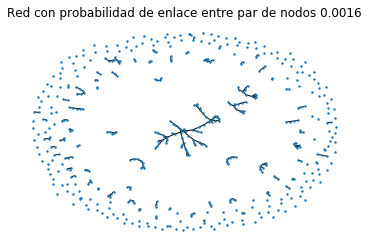

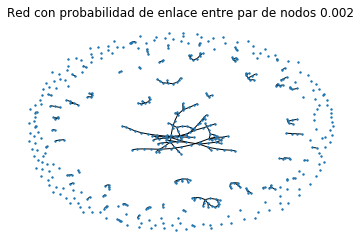

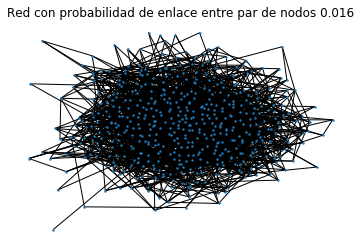

In [14]:
#grafico las tres redes con p1,p2 y p3
p = [0.0016, 0.002, 0.016]

for i, prob in enumerate(p):
    plt.title(f"Red con probabilidad de enlace entre par de nodos {prob}")
    nx.draw(G(500, prob),node_size = 2)
    plt.show()

# Ejercicio 3
Consideramos una red de Erdos-Renyi de 3000 nodos conectados con una probabilidad $p=10^{-3}$

### Inciso (a)
El numero esperado de enlaces es $\langle L \rangle = \frac{p n(n - 1)}{2} =  4498.5 $ 

Esto se debe a que la cantidad de enlaces $L$, si la probabilidad fuera 1, sería el número de combinaciones sin repetición de 2 elementos elegidos entre los n. Usando la formula de combinatoria esto termina siendo ${n \choose 2} = \frac{1}{2}n(n-1)$. Si luego en cada iteracion agregamos hay una probabilidad ($0 < p < 1)$, el valor mas probable termina siendo $pn(n-1)/2$.

### Inciso (b) 
¿En qué régimen de conectividad ubicaría a esta red?
Para encontrar en qué regimen de conectividad se ubica esta red necesitamos encontrar el $\langle k \rangle $ que esta determinado de la siguiente manera:

$$\langle k \rangle = 2 \frac{ \langle L \rangle } {N}= \frac{2pN(N - 1)}{2N} = p \cdot (N-1) = 2.999$$

Sabemos que el $k_c$ se encuentra en $\langle k \rangle = 1$ y que el regimen conectado comienza en $\langle k \rangle = ln(N) = 8.006$

Con lo cual esta red se encuentra en el regimen supercrítico pero no llega a estar en el régimen conectado.

### Inciso (c) 
Para estimar la probabilidad critica de esta red tenemos que toman en cuenta la cuenta anterior, con lo cual:

$$ \langle k_c \rangle  = p_c \cdot (N-1) = 1$$

$$ p_c = \frac{1}{N-1}= 3.33 \cdot 10^{-4}$$

### Inciso (d) 
Dada la probabilidad  $ p=10^{-3}$, el numero de nodos $N^*$ para el cual la red posee una unica componente es tal que el $ \langle k \rangle \ge ln(N)$ es decir que la red entra en el regimen conectado.  Con lo cual podemos obtener $N^*$ resolviendo la siguiente ecuación:

$$  \langle k^* \rangle  = p \cdot (N^*-1) \ge ln(N^*)$$

Es decir si buscamos el valor minimo de $N^*$, entonces:

$$ e^{p\cdot (N^*-1)} = N^*$$

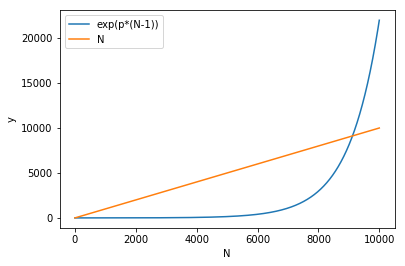

In [19]:
p = 10**(-3)
n_vect = np.arange(0, 10000)
y_vect = np.exp(p * (n_vect - 1))
plt.plot(n_vect, y_vect, label='exp(p*(N-1))')
plt.plot(n_vect, n_vect, label='N')
plt.xlabel('N')
plt.ylabel('y')
plt.legend()
plt.show()

El punto que queremos encontrar el el cruce que esta entre 8k y 10k, para eso lo vamos a hacer graficamente.

El valor de N que buscamos es el primer $N^*$ tal que $ e^{p\cdot (N^*-1)} - N^* \ge 0$

In [21]:
n_vect = np.arange(8000,10000)
y_vect = np.exp(p * (n_vect - 1))
r_vect = y_vect - n_vect
r_index = np.where(r_vect >= 0)[0][0]
n_buscado = n_vect[r_index]
print(f'N* = {n_buscado}')

N* = 9120


Es decir que a partir de 9120 nodos, la red entraria en el regimen conectado y la fracion de enlaces pertenecientes a la componente gigante tendería exponencialmente a 1.

### Inciso (e)

Para la red considerada en (d) el grado medio $ \langle k^* \rangle$ es:

$$ \langle k^* \rangle  = p \cdot (N^*-1) = 9.119 $$

y la distancia media $\langle d \rangle$ entre pares de nodos elegidos al azar la podemos calcular de la interpretando la topologia de la red. Las redes aleatorias tienden tener una topologia con forma de arbol con nodos de grado casi constante (porque los enlaces son equiprobables) con lo cual podemos estimar la $ \langle d \rangle$ de la siguiente manera:

* nro. vecinos a distancia 1:$N_1 \cong \langle k \rangle$
* nro. vecinos a distancia 2:$N_2 \cong \langle k \rangle^2$
* nro. vecinos a distancia d:$N_d \cong \langle k \rangle^d$

$$d_{max} = N = 1 + \langle k \rangle + \langle k \rangle^2 + ... + \langle k \rangle^d = \frac{\langle k \rangle^{d+1}-1}{\langle k \rangle-1} \cong \langle k \rangle^d$$

Entonces,
$$d_{max}= \frac{ ln(N)} {ln (\langle k \rangle)} $$

En la mayoría de los casos, este resultado se acerca mas a $ \langle d \rangle$ que a $d_{max}$ debido a que $d_{max}$ esta influido fuertemente por unos pocos caminos de longitud mas larga, y  $ \langle d \rangle$ está promediada entre todos los pares de nodos.

Esto implica que las distancias en una red aleatoria son varios ordenes de magnitud menores a su tamaño N.

Calculando asi  $ \langle d \rangle$ obtenemos:

$$ \langle d \rangle =\frac{ ln(N)} {ln (\langle k \rangle)} = \frac{ln(9120)}{ln(9.119)}\cong 4.125   $$

# Ejercicio 4
Veamos los resultados  obtenidos  en  los  puntos  (a),  (c)  y  (d)  del  problema  anterior  con simulaciones del ensemble de redes G(N,p)

In [26]:
#Inicialmente creo una funcion que devuelva cantidad de enlaces en funcion de n y p
def ErdosRenyi_m(n,p):
    m = 0
    #Itero sobre los pares i-j
    for i in range(n):
        for j in range(i+1,n):
            random_sample = random.random()
            if random_sample <= p:
                m+=1
    return(m)

#Creo una funcion que devuelve el listado de edges en funcion de n y p
def ErdosRenyi_edges(n,p):
    edges = []
    #Itero sobre los pares i-j
    for i in range(n):
        for j in range(i+1,n):
            random_sample = random.random()
            if random_sample <= p:
                edges.append((i,j))
    return(edges)

### Comparacion con el punto 3) a.
Veamos la cantidad de enlaces para distintas iteraciones de este ensemble de $n=3000$ y $p=10^{-3}$

In [111]:
n = 3000 #cantidad de nodos
p = 10**(-3)

In [112]:
nIteraciones = 200
nEnlaces = []
for i in tqdm(range(nIteraciones)):
    nEnlaces.append(ErdosRenyi_m(n,p))

100%|██████████| 200/200 [01:22<00:00,  2.43it/s]


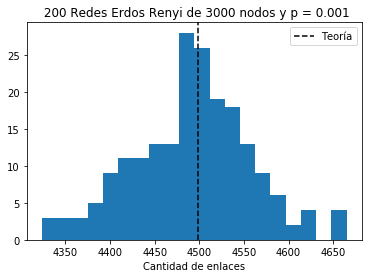

In [113]:
enlaces_esperados = p * n * (n - 1) / 2
plt.hist(nEnlaces, bins =20)
plt.axvline(enlaces_esperados, label = 'Teoría', c = 'black', ls = "--")
plt.xlabel("Cantidad de enlaces")
plt.title(f" {nIteraciones} Redes Erdos Renyi de {n} nodos y p = {p}" )
plt.legend()
plt.show()

In [114]:
nEnlaces_mean = np.mean(nEnlaces)
nEnlaces_std = np.std(nEnlaces)
nEnlaces_calculado = p * n * (n - 1) / 2
print(f'<L> calculado = {nEnlaces_calculado}\n<L> simulado = {nEnlaces_mean} +/- {np.round(nEnlaces_std,2)}')

<L> calculado = 4498.5
<L> simulado = 4492.375 +/- 64.76


El valor medio de enlaces calculado está dentro del intervalo de confianza alrededor del valor medio de enlaces simulado con una muestra de 200 iteraciones.

### Comparacion con el punto 3) c.

De los calculos teoricos obtuvimos el resultado $ p_c = \frac{1}{N-1}= 3.33 \cdot 10^{-4}$

Para compararlo con las simulaciones lo que vamos a hacer es armar el grafico de la fraccion de nodos pertenecientes a la CG (S), en funcion de la probabilidad p.

Teniendo en cuenta que esto tipicamente se grafica en funcion de $\langle k \rangle $, primero recordemos la relacion entre $\langle kc \rangle $ y $p_c$:
$$ \langle k_c \rangle  = p_c \cdot (N-1) = 1$$

In [61]:
def ErdosRenyi_sizeGC(n,p):
    red=nx.empty_graph(n)
    red.add_edges_from(ErdosRenyi_edges(n,p))
    componentes=[red.subgraph(componente) 
                      for componente in sorted(nx.connected_components(red), 
                                               key=len, reverse=True)]
    del red
    gigante = componentes[0]
    del componentes
    frac_gigante = gigante.number_of_nodes() / n
    del gigante
    return frac_gigante

In [70]:
n = 3000 #cantidad de nodos
nProb = 10
p_vect = np.geomspace(10 **(-4), 1, num = nProb)
sizeGC = []
for p in tqdm(p_vect):
    sizeGC.append(ErdosRenyi_sizeGC(n,p))
    percent_used = getattr(psutil.virtual_memory(), 'percent')
    #if percent_used > 80: print('breaking');break

100%|██████████| 10/10 [00:58<00:00,  5.90s/it]


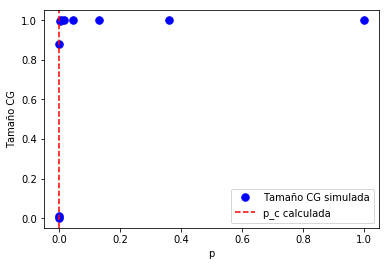

In [74]:
plt.plot(p_vect, sizeGC,'b.', label = 'Tamaño CG simulada', ms = 15)
plt.axvline(x = 1 / (n - 1), color='red',label='p_c calculada', ls = "--")
plt.xlabel('p')
plt.ylabel('Tamaño CG')
plt.legend()
plt.show()

La probabilidad critica, que habiamos predecido que ocurría en $ 3.33 \cdot 10^{-4}$ parece ocurrir muy cercana a 0, vamos a graficar en el intervalo $\left \{ 10^{-4} , 10^{-3}\right \}$

In [76]:
n = 3000 #cantidad de nodos
nProb=100
p_vect =  np.geomspace(10**(-4), 10**(-3), num = nProb)
p_vect = np.repeat(p_vect,5)
sizeGC=[]
for p in tqdm(p_vect):
    sizeGC.append(ErdosRenyi_sizeGC(n,p))
    percent_used = getattr(psutil.virtual_memory(), 'percent')
    #if percent_used > 80: print('breaking');break

100%|██████████| 500/500 [06:00<00:00,  1.39it/s]


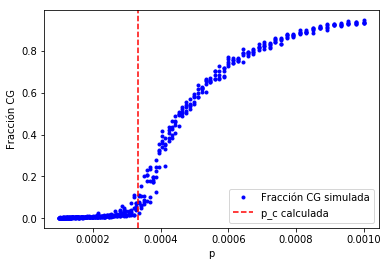

In [78]:
plt.plot(p_vect,sizeGC,'b.',label='Fracción CG simulada')
plt.axvline(x=1/(n-1), color='red',label='p_c calculada', ls = "--")
plt.xlabel('p')
plt.ylabel('Fracción CG')
plt.legend()
plt.show()

Para una mejor visualización de los datos vamos a promediar agrupando por p, ya que para cada p se usaron 5 muestras.

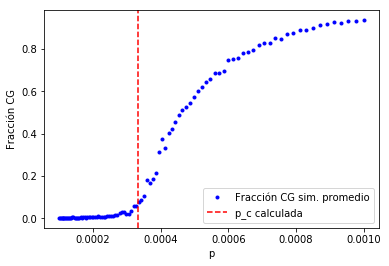

In [86]:
values = pd.DataFrame(p_vect, columns=['p'])
values['S'] = sizeGC
result = values.groupby(['p'], as_index=False).agg({'S':['mean','std']})

plt.plot(result['p'],result['S']['mean'],'b.',label='Fracción CG sim. promedio')
plt.axvline(x = 1 / (n - 1), color='red',label='p_c calculada', ls = "--")
plt.xlabel('p')
plt.ylabel('Fracción CG')
plt.legend()
plt.show()

Se observa un cambio de comportamiento en la p crítica calculada anteriormente.

### Comparacion con el punto 3) d.

In [88]:
def ErdosRenyi_nComponentes(n,p):
    red=nx.empty_graph(n)
    red.add_edges_from(ErdosRenyi_edges(n,p))
    componentes=[red.subgraph(componente) 
                      for componente in sorted(nx.connected_components(red), 
                                               key=len, reverse=True)]
    del red
    nComponentes= len(componentes)
    del componentes
    return nComponentes

In [90]:
p = 10**(-3)
n_vect = np.arange(3000,12000,1000)
nComponentes = []
for n in tqdm(n_vect):
    nComponentes.append(ErdosRenyi_nComponentes(n,p))
    percent_used = getattr(psutil.virtual_memory(), 'percent')
    #if percent_used > 80: print('breaking');break

100%|██████████| 9/9 [00:24<00:00,  2.74s/it]


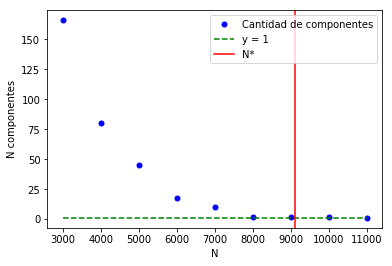

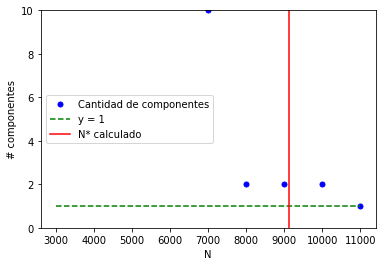

In [96]:
plt.plot(n_vect,nComponentes,'b.',label='Cantidad de componentes', ms = 10)
plt.plot(n_vect,1 + n_vect * 0,'g--',label='y = 1')
plt.axvline(x=9120, color='red',label='N*')
plt.xlabel('N')
plt.ylabel('N componentes')
plt.legend()
plt.show()

plt.plot(n_vect,nComponentes,'b.',label='Cantidad de componentes', ms = 10)
plt.plot(n_vect,1 + n_vect * 0,'g--',label='y = 1')
plt.axvline(x=9120, color='red',label='N* calculado')
plt.xlabel('N')
plt.ylabel('# componentes')
plt.ylim([0,10])
plt.legend()
plt.show()

Podemos ver que a medida que N crece,la cantidad de componentes separados desciende rapidamente a 1. 

Vamos a ver qué pasa en la zona mas cercana al N* encontrado y tomando mas muestras.

In [98]:
p = 10**(-3)
n_vect = np.arange(8000,20000,1000)
n_vect = np.repeat(n_vect,50)
nComponentes = []
for n in tqdm(n_vect):
    nComponentes.append(ErdosRenyi_nComponentes(n,p))
    #percent_used = getattr(psutil.virtual_memory(), 'percent')
    #if percent_used > 80: print('breaking');break

100%|██████████| 600/600 [1:36:38<00:00,  9.66s/it]


Es importante notar que lo que queremos ver es cuantas veces la red llega a tener una unica componente para cada N, con lo cual queremos agrupar por N y promediar la cantidad de veces que fue tuvo una solo componente.

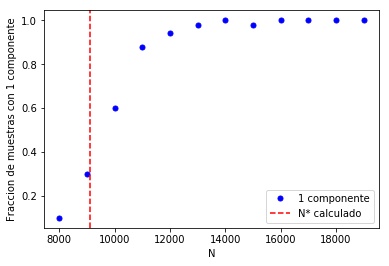

In [101]:
values = pd.DataFrame(n_vect,columns=['n'])
values['nComponentes'] = nComponentes
values['is1'] = values['nComponentes'] == 1
result = values.groupby(['n'], as_index = False).agg({'is1':['mean','std']})
plt.plot(result['n'],result['is1']['mean'],'b.',label='1 componente', ms = 10)
plt.axvline(x = 9120, color='red',label='N* calculado', ls = '--')
plt.xlabel('N')
plt.ylabel('Fraccion de muestras con 1 componente')
plt.legend()
plt.show()

De aca vemos que no alcanza con tomar $N^* = 9120$ si queremos asegurar que siempre va a haber una unica componente conectada, pero podemos dar una idea de la proporción de veces que va a haber una única componente conectada para cada N. Podríamos asegurar por ejemplo que para $N > 10500$ en el $60 \%$  de las veces vamos a tener $1$ sola componente.

# Ejercicio 5

El _modelado en cascada_ G(N,p) es una forma de generar grafos random dirigidos acíclicos (DAG) 
utilizados por ejemplo para modelar redes tróficas. El mismo consiste en: 
* Etiquetar los nodos de una red G(N,p) de partida
* Asignar direccionalidad a cada enlace, desde el nodo de etiqueta mayor al de menor valor (de esta manera se asegura que la red sea acíclica)

## Inciso (a)
* Buscamos el $\langle k^{in}_{i} \rangle$. El nodo $i$ puede recibir enlaces de sus todos los nodos $j$ con $j > i$. Es decir, $j = n - i$ con $n$ la cantidad de nodos totales. Cada uno de esos enlaces tiene probabilidad $p$ de enlazarse. 

$\Rightarrow \langle k^{in}_{i} \rangle = (n - i) p $

* A su vez, cada nodo $i$ puede enlazarse con los nodos $l$ con $l < i$. Es decir, $l = i - 1$. Cada uno de esos enlaces también ocurren con probabilidad $p$.

$\Rightarrow \langle k^{out}_{i} \rangle = (i - 1) p $

## Inciso (b)
Luego nos interesa el número esperado de enlaces que conectan el nodo $i$ y menores, desde
vértices mayores a $i$. Tomo el nodo $i$, éste puede recibir $n -i$ enlaces (provenientes de todos los nodos con índice mayores a él). El nodo $i - 1$ puede a lo sumo recibir también $ n -i $ enlaces de nodos con índice mayores a $i$. Es decir, cada uno de los $i$ nodos con índice menor o igual a $i$ pueden recibir $n -i$ enlaces con estas condiciones. Cada uno de esos enlaces puede suceder con probabilidad $p$.

Por ende, el número de enlaces esperado es $i (n - i) p = (ni - i^2)p$

Vamos a ver si se cumple la relación teórica. Tomamos redes acíclicas dirigidas de $1000$ nodos con $p$ variando de $0.1$ a $1$. Para las mismas guardamos sus in-degrees, sus out-degrees y la cantidad de enlaces con las caracteristicas del **Inciso (b)**.

In [102]:
k_in = {}
k_out = {}
num_edges = {}
n = 1000

for p in np.arange(0.1,1,0.1):
    G = nx.gnp_random_graph(n ,p, directed=True)
    DAG = nx.DiGraph([(u,v) for (u,v) in G.edges() if v<u])
    k_in[p] = {}
    k_in[p] = dict(DAG.in_degree)
    k_out[p] = {}
    k_out[p] = dict(DAG.out_degree)
    
    #Punto b, calculo enlaces de nodos mayores a i hasta i
    num_edges[p] = {}
    for i in range(0, n):
        for (u,v) in DAG.edges():
            if  v <= i: #nodos menores o iguales
                if u > i: #de nodos mayores a i
                    if num_edges[p].get(i):
                        num_edges[p][i] +=  1
                    else:
                        num_edges[p][i] = 1 

Hacemos un gráfico de los in-degrees para cada nodo y lo comparamos con el valor esperado teóricamente. 

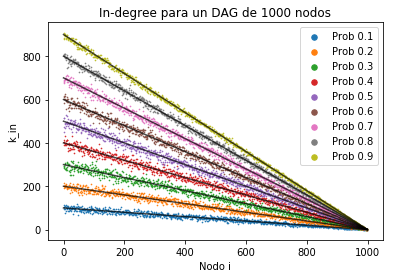

In [105]:
error_dict = {}
for p in k_in.keys():
    x, y = zip(*k_in[p].items())
    plt.scatter(x, y, label = f'Prob {round(p, 2)}', s = 0.4)

    x_teo = range(0,n)
    y_teo = []
    for i in x_teo:
        y_teo.append((n - i) * p)
    plt.plot(x_teo, y_teo, c = "black", alpha = 0.7)
    
    values, cov = np.polyfit(x, y, 1, cov=True)
    error_dict[f'Prob {round(p,2)}'] = abs(values[0] - (- p)) * 100 / p

plt.plot()
plt.xlabel('Nodo i')
plt.ylabel('k_in')
plt.title(f'In-degree para un DAG de {n} nodos')
lgnd = plt.legend(scatterpoints=1, fontsize=10)
for i in range(0, len(k_in.keys())):
    lgnd.legendHandles[i]._sizes = [30]
plt.show()

In [106]:
df = pd.DataFrame.from_dict(error_dict, orient='index', dtype=None, columns=["Diferencia con el valor teorico (%)"])
df.astype(float).round(2)

,Diferencia con el valor teorico (%)
Prob 0.1,0.17
Prob 0.2,0.11
Prob 0.3,0.02
Prob 0.4,0.10
Prob 0.5,0.34
Prob 0.6,0.35
Prob 0.7,0.25
Prob 0.8,0.13
Prob 0.9,0.22


Hacemos lo mismo para los out-degrees también comprobando la relación teórica. 


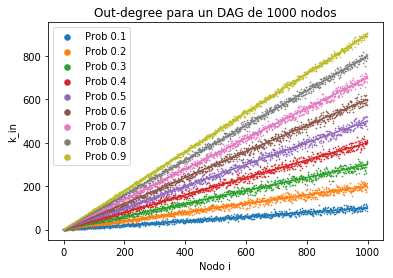

In [107]:
error_out_dict = {}
for p in k_out.keys():
    x, y = zip(*k_out[p].items())
    plt.scatter(x, y, label = f'Prob {round(p, 2)}', s = 0.4)

    x_teo = range(0, n)
    y_teo = []
    for i in x_teo:
        y_teo.append((i - 1) * p)
    plt.plot(x_teo, y_teo)
    
    values, cov = np.polyfit(x, y, 1, cov=True)
    error_out_dict[f'Prob {round(p,2)}'] = abs(values[0] - p) * 100 / p
    

lgnd = plt.legend(scatterpoints=1, fontsize=10)
for i in range(0, len(k_in.keys())):
    lgnd.legendHandles[i]._sizes = [30]
plt.plot()
plt.xlabel('Nodo i')
plt.ylabel('k_in')
plt.title(f'Out-degree para un DAG de {n} nodos')
plt.show()

In [108]:
df = pd.DataFrame.from_dict(error_out_dict, orient='index', dtype=None, columns=["Diferencia con el valor teorico (%)"])
df.astype(float).round(2)

,Diferencia con el valor teorico (%)
Prob 0.1,0.01
Prob 0.2,0.44
Prob 0.3,0.70
Prob 0.4,0.12
Prob 0.5,0.06
Prob 0.6,0.07
Prob 0.7,0.38
Prob 0.8,0.07
Prob 0.9,0.01


Veamos ahora los enlaces pedidos en el **Inciso (b)**. Para los mismos también les buscaremos el máximo y el mínimo. 

Teóricamente el máximo lo podemos hallar al derivar la expresión de enlaces E con respecto a $i$. 

$\frac{dE}{di} = (n - 2i) p$

Igualamos a cero considerando que $p, n \neq 0$. 

$\Rightarrow i = \frac{n}{2}$. 

Es decir, el máximo está el nodo de la "mitad". El modelo de cascada predice que el flujo será mayor en las porciones medias del grafo y menos en sus extremos. En los extremos es trivial que estén los mínimos ya que se da por condiciones de borde: el nodo $0$ no tiene nodos de íncide menores quiénes le puedan dar enlaces y el nodo $n$ no tiene nodos mayores a quién darle enlaces.

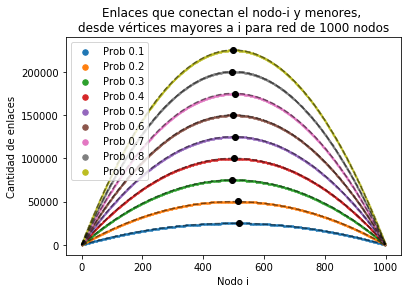

 El máximo se encuentra en promedio en el nodo 502 +- 8


In [109]:
xs_max = []
for p in num_edges.keys():
    x, y = zip(*num_edges[p].items())
    plt.scatter(x, y, label = f'Prob {round(p, 2)}', s = 0.5)
    y_max = max(y)
    x = np.array(x)
    y = np.array(y)
    x_max = x[np.where(y == y_max)]
    xs_max.append(x_max)
    plt.scatter(x_max, y_max, c= 'black')
    
    x_teo = range(0, n)
    y_teo = []
    for i in x_teo:
        y_teo.append((n * i - i * i) * p)
    plt.plot(x_teo, y_teo, linestyle = '--', c = 'black', alpha = 0.5)
    

lgnd = plt.legend(scatterpoints=1, fontsize=10)
for i in range(0, len(k_in.keys())):
    lgnd.legendHandles[i]._sizes = [30]
plt.xlabel('Nodo i')
plt.ylabel('Cantidad de enlaces')
plt.title(f'Enlaces que conectan el nodo-i y menores, \n'
          f'desde vértices mayores a i para red de {n} nodos')
plt.show()

print(f' El máximo se encuentra en promedio en el nodo {int(np.mean(xs_max))} +- {int(np.std(xs_max))}')